In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem
import pandas as pd

In [2]:
mols = pd.read_csv("All_fragments_COCONUT_V4_184769.csv")
mols.tail(2)

,DATABASE_ID,DATABASE_NAME,All_fragments,All_fragments_h,Counts
184767,COCONUT-FRAGMENT_184768,COCONUT-FRAGMENT,*NC(C(=O)NCCCOC)C(C)CC,CCC(C)C(N)C(=O)NCCCOC,1
184768,COCONUT-FRAGMENT_184769,COCONUT-FRAGMENT,*OC1CC2C3CCC4C(OC(C)=O)CCCC4(C)C3C(=O)CC2(C)C1,CC(=O)OC1CCCC2(C)C1CCC1C3CC(O)CC3(C)CC(=O)C12,1


In [3]:
#List of SMILES fragments
mols = list(mols["All_fragments_h"])
#List of fragments turned into molecules
mols = [Chem.MolFromSmiles(x) for x in mols]

In [4]:
print(len(mols)) #184769

184769


In [5]:
#SMARTS of alcohol derived from betulinic acid
OH = "[#8]-[#6]-1-[#6]-[#6]-[#6]-2-[#6](-[#6]-[#6]-[#6]-3-[#6]-4-[#6]-[#6]C5([#6]-[#6]-[#6]-[#6]5-[#6]-4-[#6]-[#6]-[#6]-2-3)[#6]([#8;A;H1,-])=O)-[#6]-1"

In [6]:
#natural products’ fragments with cyclic system skeleton derived from betulinic acid 
patt2 = Chem.MolFromSmarts(OH) #hydroxil group
hydroxyl = [x for x in mols if x.HasSubstructMatch(patt2)]
print("Hydroxyl: {}".format(len(hydroxyl)))

Hydroxyl: 1


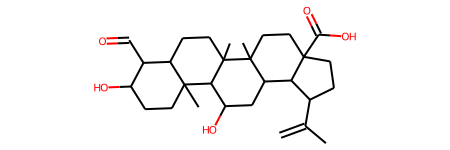

In [7]:
hydroxyl[0]

In [8]:
# SMILES of 2,2-dimethylsuccinic a
CO = "CC(C)(CC(O)=O)C(O)=O"
carboxy =[CO]
carboxy = [Chem.MolFromSmiles(x)for x in carboxy]
#SMARTS of carboxyl group 
CO2H= "[#6]C([#6])([#6]-[#6](-[#8])=O)[#6](-[#8])=O"
#Select of carboxylic group
patt3 = Chem.MolFromSmarts(CO2H)
carboxy = [x for x in carboxy if x.HasSubstructMatch(patt3)]
print("Carboxy: {}".format(len(carboxy)))

Carboxy: 1


In [9]:
#Build of ester bond
rxn = AllChem.ReactionFromSmarts("[#6:1][#6;A;X4:3]([#6:2])[#6:4]-[#6:5]([#8;A])=[O:6].[#8:7]-[#6:8]-1-[#6:9]-[#6:10]-[#6:11]-2-[#6:27](-[#6:26]-[#6:25]-[#6:24]-3-[#6:23]-4-[#6:22]-[#6:21][C:20]5([#6:19]-[#6:18]-[#6:17]-[#6:16]5-[#6:15]-4-[#6:14]-[#6:13]-[#6:12]-2-3)[#6:29](-[#8:31])=[O:30])-[#6:28]-1>>[#6:2][#6;A;X4:3]([#6:1])[#6:4]-[#6:5](=[O:6])-[#8:7]-[#6:8]-1-[#6:9]-[#6:10]-[#6:11]-2-[#6:27](-[#6:26]-[#6:25]-[#6:24]-3-[#6:23]-4-[#6:22]-[#6:21][C:20]5([#6:19]-[#6:18]-[#6:17]-[#6:16]5-[#6:15]-4-[#6:14]-[#6:13]-[#6:12]-2-3)[#6:29](-[#8:31])=[O:30])-[#6:28]-1")
ester = AllChem.EnumerateLibraryFromReaction(rxn, [carboxy, hydroxyl])
ester_smi = list(set(Chem.MolToSmiles(i[0], isomericSmiles=True) for i in ester))
print("ester_smi: {}". format(len(ester_smi)))

ester_smi: 1


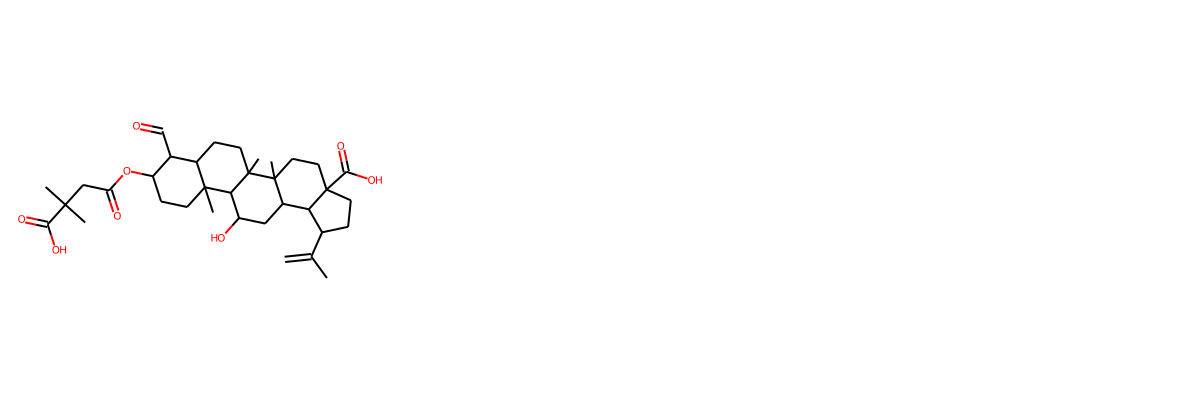

In [10]:
mol_ester = [Chem.MolFromSmiles(x) for x in ester_smi]
mol_ester = Chem.Draw.MolsToGridImage(mol_ester, molsPerRow=3, subImgSize=(400,400), returnPNG=False)
mol_ester

In [11]:
#SMARTS of diaminoethane
diaminoethane ="[#7;H1;X3][#6;H2;X4][#6;H2;X4][#7;H2;X3]" 
patt1 = Chem.MolFromSmarts(diaminoethane)
diaminoethane = [x for x in mols if x.HasSubstructMatch(patt1)]
print("diaminoethane: {}".format(len(diaminoethane)))
#SMARTS of diaminopropane
diaminopropane = "[#7;H1;X3][#6;H2;X4][#6;H2;X4][#6;H2;X4][#7;H2;X3]"
patt1 = Chem.MolFromSmarts(diaminopropane)
diaminopropane = [x for x in mols if x.HasSubstructMatch(patt1)]
print("diaminopropane: {}".format(len(diaminopropane)))
amine_1 = diaminoethane + diaminopropane
print("amine_1: {}".format(len(amine_1)))
#SMARTS of piperazine 
piperazine = "[#6;H2;X4]1-[#6;H2;X4][#7;X3;!H1][#6;H2;X4]-[#6;H2;X4][#7;H1;X3]1"
patt1 = Chem.MolFromSmarts(piperazine)
piperazine = [x for x in mols if x.HasSubstructMatch(patt1)]
print("piperazine: {}".format(len(piperazine)))
# esters of fragments
ester = ester_smi
carboxyl = [Chem.MolFromSmiles(x) for x in ester]
print("carboxyl : {}".format(len(carboxyl)))

diaminoethane: 175
diaminopropane: 29
amine_1: 204
piperazine: 1332
carboxyl : 1


In [12]:
mols = 0

In [13]:
#Built amide bound from diaminoethane
rxn = AllChem.ReactionFromSmarts("[#7;H1;X3:7][#6;H2:6][#6;H2:5][#7;H2;X3:4].[#6;A;r5:1][#6:2]([#8;A;H1,-])=[O:3]>>[#6;A;r5:1][#6:2](=[O:3])-[#7:4]-[#6;H2:5]-[#6;H2:6]-[#7;H1;X3:7]")
amide = AllChem.EnumerateLibraryFromReaction(rxn, [diaminoethane, carboxyl])
amide_smi_1 = list(set(Chem.MolToSmiles(i[0], isomericSmiles=True) for i in amide))
len(amide_smi_1)

175

In [14]:
#Built amide bound from diaminopropane
rxn = AllChem.ReactionFromSmarts("[#7;H1X3:8][#6H2:7][#6H2:6][#6H2:5][#7;H2X3:4].[#6;A;r5:1][#6:2]([#8;A;H1,-])=[O:3]>>[#6;A;r5:1][#6:2](=[O:3])-[#7:4]-[#6H2:5]-[#6H2:6]-[#6H2:7]-[#7;H1X3:8]")
amide = AllChem.EnumerateLibraryFromReaction(rxn, [diaminopropane, carboxyl])
amide_smi_2 = list(set(Chem.MolToSmiles(i[0], isomericSmiles=True) for i in amide))
len(amide_smi_2)

29

In [15]:
#Built amide bound from piperazine
rxn = AllChem.ReactionFromSmarts("[#6:9]-1-[#6:8]-[#7H1;!$([#7]-C=[O,N,S])!$([#7]~[!#6]):4]-[#6:5]-[#6:6]-[#7;H0;X3:7]-1.[#6;A;r5:1][#6:2]([#8;A;H1,-])=[O:3]>>[#6;A;r5:1][#6:2](=[O:3])-[#7;H0;X3:4]-1-[#6:5]-[#6:6]-[#7;H0;X3:7]-[#6:8]-[#6:9]-1")
amide = AllChem.EnumerateLibraryFromReaction(rxn, [piperazine, carboxyl])
amide_smi_3 = list(set(Chem.MolToSmiles(i[0], isomericSmiles=True) for i in amide))
len(amide_smi_3)

1332

In [16]:
amide_smi = amide_smi_1 + amide_smi_2 + amide_smi_3

/home/ana/anaconda3/envs/my-rdkit-env/lib/python3.7/site-packages/rdkit/Chem/Draw/IPythonConsole.py:192: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  % (maxMols))


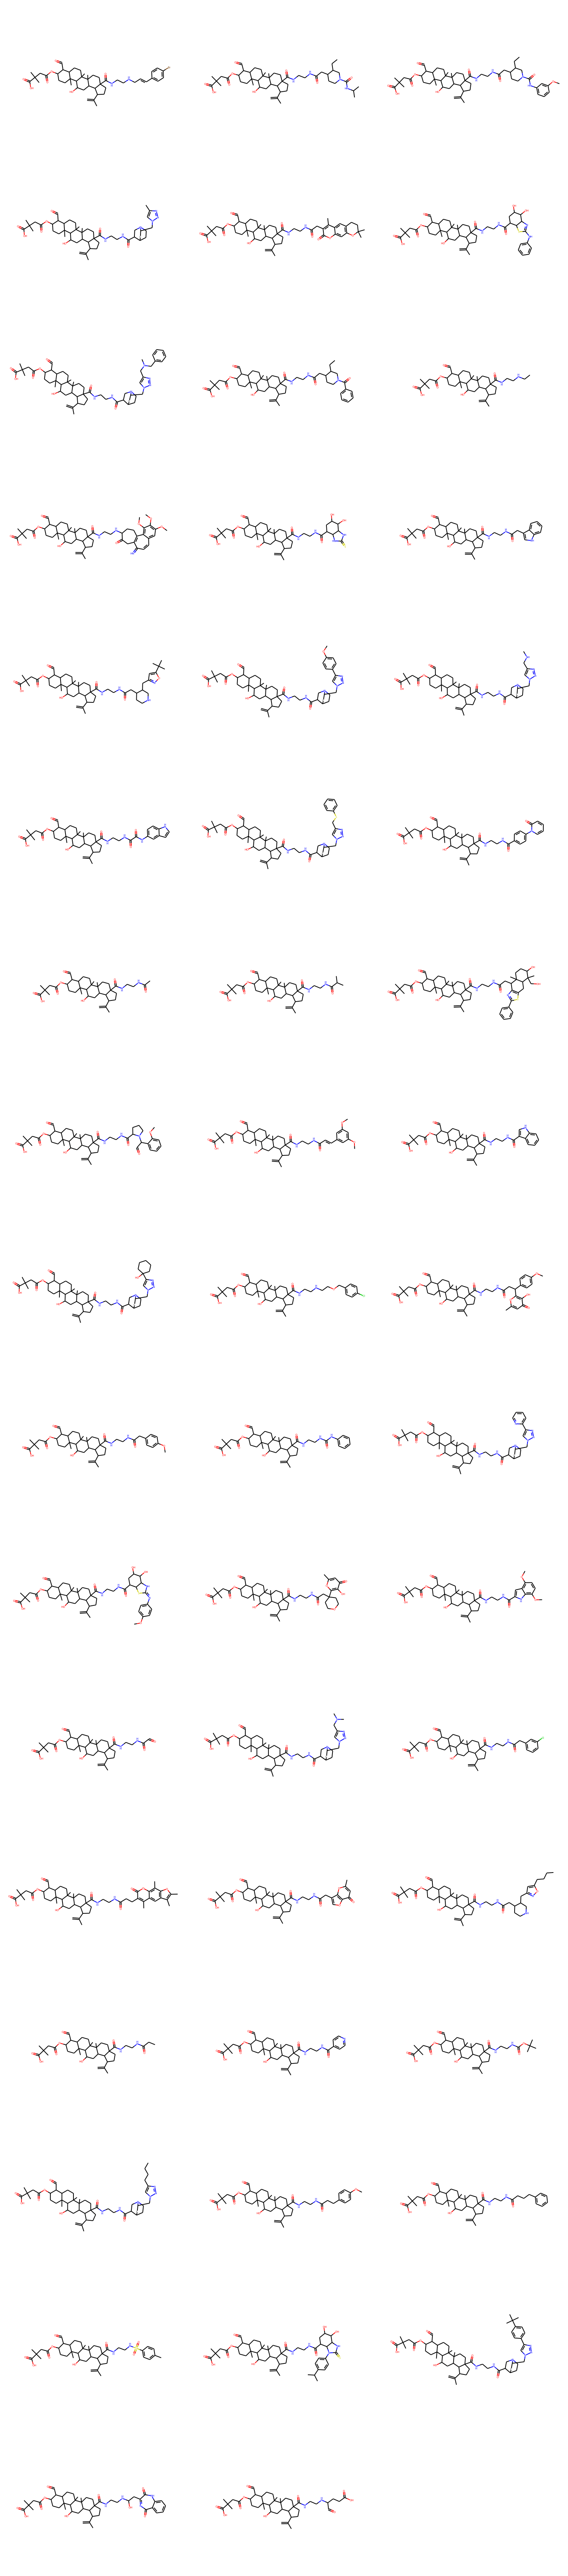

In [17]:
smi = amide_smi_1
mols = [Chem.MolFromSmiles(x) for x in smi]
mol = Chem.Draw.MolsToGridImage(mols, molsPerRow=3, subImgSize=(500,400), returnPNG=False)
mol

In [18]:
len(amide_smi)

1536

In [19]:
#Generate dataframe with smiles
DB = pd.DataFrame(amide_smi, columns=["SMILES"])
DB.tail(2)

,SMILES
1534,C=C(C)C1CCC2(C(=O)N3CCN(Cc4cc(CC5CCC(O)C(C)O5)...
1535,C=C(C)C1CCC2(C(=O)N3CCN(CCC4CNCCC4CC(=O)OC(C)(...


In [20]:
#Unique SMILES
DB = DB.drop_duplicates(subset=['SMILES'], keep ="first").reset_index(drop = True)
DB.shape

(1536, 1)

In [21]:
DB.to_csv("HIV_INHIBITORS_FROM_COCONUT_1536.csv", sep=",", index = False) 